In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [41]:
df = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv", skiprows=4, delimiter=",")
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN


In [42]:
Country = pd.read_csv("Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv")
Country.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [43]:
Indicator = pd.read_csv("Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv")
Indicator.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,NaN


In [45]:
print(df.columns)
df.columns = df.columns.str.strip()
selected_countries = ["United States", "India", "China", "Brazil", "Germany"]
df_selected = df[df["Country Name"].isin(selected_countries)]

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')


In [ ]:
if "Country Name" not in df.columns:
    print(" العمود 'Country Name' غير موجود. تحقق من أسماء الأعمدة.")
    print("الأعمدة المتوفرة:", df.columns.tolist())
else:
    year_columns = [col for col in df.columns if col.isdigit()]

In [56]:
df["Country Name"] = df["Country Name"].str.strip().str.lower()
selected_countries = ["united states", "india", "china", "brazil", "germany"]
df_selected = df[df["Country Name"].isin(selected_countries)]


In [51]:
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]


In [57]:
df_melted = df_selected.melt(id_vars=["Country Name"], value_vars=year_columns,
                                 var_name="Year", value_name="Population")


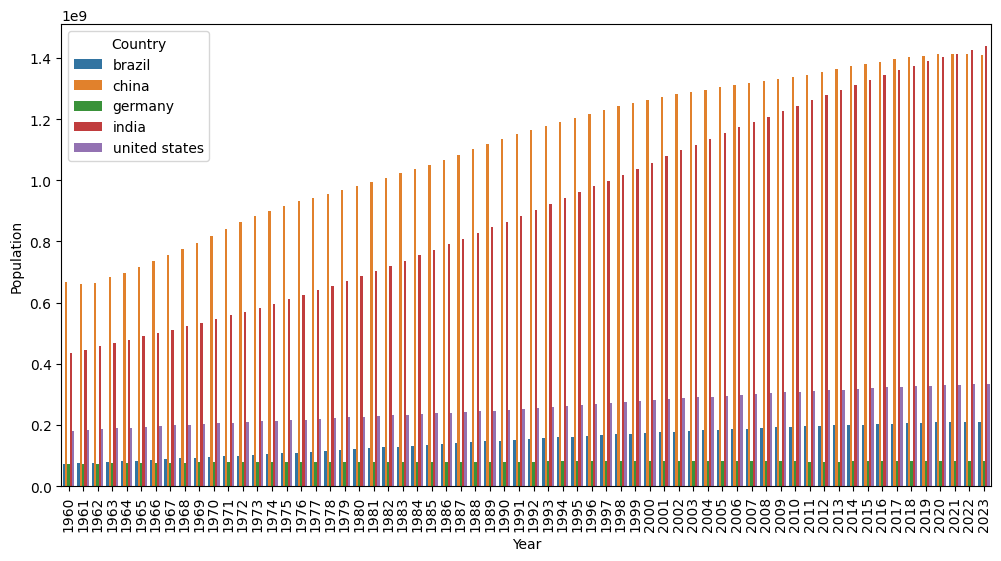

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Year", y="Population", hue="Country Name")
plt.xticks(rotation=90)  # تدوير محاور السنوات  plt.title("Population Distribution Over Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Country")
plt.show()
